In [100]:
import pandas as pd
import nltk
from nltk import*
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
from collections import Counter

# Data Cleaning and Exploration

In [101]:
df = pd.read_csv("Satzveri2_36_Itemslong_short.txt",  sep= ',', header= 0)
df = df.drop(['Column 1'], axis=1)

In [102]:
df.head()

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent
0,Die Biene ist aktiv.,Biene,positiv,aktiv,positiv,4
1,Die Brautjungfer ist amüsant.,Brautjungfer,positiv,amüsant,positiv,7
2,Der Garten ist berühmt.,Garten,positiv,berühmt,positiv,6
3,Der Gewinn ist süß.,Gewinn,positiv,süß,positiv,7
4,Der Künstler ist gutmütig.,Künstler,positiv,gutmütig,positiv,6


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Satz                 561 non-null    object
 1   noun                 561 non-null    object
 2   polarity_noun        561 non-null    object
 3   adjective            561 non-null    object
 4   polarity_adj         561 non-null    object
 5   valence_rating_sent  561 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 26.4+ KB


In [104]:
df.shape

(561, 6)

In [105]:
df.columns

Index(['Satz', 'noun', 'polarity_noun', 'adjective', 'polarity_adj',
       'valence_rating_sent'],
      dtype='object')

In [106]:
len(df.noun.unique())

193

In [107]:
len(df.adjective.unique())

279

In [108]:
df.polarity_noun.value_counts()

positiv    281
negativ    280
Name: polarity_noun, dtype: int64

In [109]:
df.polarity_adj.value_counts()

positiv    189
negativ    188
neutral    184
Name: polarity_adj, dtype: int64

In [110]:
df.valence_rating_sent.value_counts()

5    101
4     99
3     89
2     82
6     73
7     49
1     44
8     23
9      1
Name: valence_rating_sent, dtype: int64

In [111]:
df["tokenized_sents"] = df.apply(lambda row: nltk.word_tokenize(row["Satz"]), axis=1)

In [112]:
df.head()

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent,tokenized_sents
0,Die Biene ist aktiv.,Biene,positiv,aktiv,positiv,4,"[Die, Biene, ist, aktiv, .]"
1,Die Brautjungfer ist amüsant.,Brautjungfer,positiv,amüsant,positiv,7,"[Die, Brautjungfer, ist, amüsant, .]"
2,Der Garten ist berühmt.,Garten,positiv,berühmt,positiv,6,"[Der, Garten, ist, berühmt, .]"
3,Der Gewinn ist süß.,Gewinn,positiv,süß,positiv,7,"[Der, Gewinn, ist, süß, .]"
4,Der Künstler ist gutmütig.,Künstler,positiv,gutmütig,positiv,6,"[Der, Künstler, ist, gutmütig, .]"


# SentiArt

In [113]:
TC = "120kSentiArt_DE.xlsx"

In [114]:
sa = pd.read_excel(TC)
sa.head()

,word,wordLC,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
0,Aachen,aachen,0.6557,0.097,-1.0980,-1.2940,-0.4470,-1.3020,-0.6360
1,Aal,aal,0.3076,0.234,-0.4620,1.4168,-0.1940,0.1161,-0.3240
2,Aale,aale,0.0619,0.218,-0.1440,0.4773,-0.1210,-0.1830,0.0135
3,Aas,aas,-1.0440,0.258,0.1618,2.0333,0.3128,0.3957,-0.8440
4,Aasfresser,aasfresser,-1.5150,0.327,1.1859,1.9843,0.2766,0.6850,0.5720


In [115]:
sa[sa.word == "ist"]

,word,wordLC,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
89714,ist,ist,0.2667,0.185,0.0794,-0.521,0.3249,-0.26,0.7149


In [116]:
sa[sa.word == "der"]

,word,wordLC,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
74617,der,der,0.2257,0.203,0.2325,-0.814,0.0234,-0.916,0.7538


In [117]:
sa[sa.word == "die"]

,word,wordLC,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
74808,die,die,0.1848,0.276,0.8681,-0.462,0.3611,-0.308,0.9097


In [118]:
sa[sa.word == "das"]

,word,wordLC,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
74227,das,das,0.3281,0.254,0.5385,-0.139,0.7349,0.1064,0.9486


In [119]:
sent_AAPz_noun = []
sent_AAPz_adj = []
sent_AAPz_sent = []

In [120]:
my_list = []
for sent in df.tokenized_sents:
    my_list.append(sent)
    
nouns = []
for noun in df.noun:
    nouns.append(noun)
    
adjs = []
for adj in df.adjective:
    adjs.append(adj)

In [121]:
len(set(adjs))

279

In [122]:
len(set(nouns))

193

# The Hit Rate (94.958 %)

In [123]:
word_list = []
for sent in df.tokenized_sents:
    for word in sent:
        word_list.append(word)

In [124]:
senti_words = []
for word in sa.word:
    senti_words.append(word)
print(len(senti_words))

match_senti = []
for word in set(word_list):
    if word in senti_words:
        match_senti.append(word)
print(len(match_senti))
print(len(set(word_list)))

116313
452
476


In [125]:
print("The hit rate of SentiArt = ", round(len(match_senti)*100/len(set(word_list)),3), "%")

The hit rate of SentiArt =  94.958 %


In [126]:
for sent in my_list:
    dt = sa.query("word in @sent")
    sent_AAPz_sent.append(dt.AAPz.mean())    

In [127]:
for noun in nouns:
    dt = sa.query("word in @noun")
    sent_AAPz_noun.append(dt.AAPz.mean())

In [128]:
for adj in adjs:
    dt = sa.query('word in @adj')
    sent_AAPz_adj.append(dt.AAPz.mean())

In [129]:
df["senti_adj"] = sent_AAPz_adj
df["senti_noun"] = sent_AAPz_noun
df["senti_sent"] = sent_AAPz_sent

In [130]:
print(df.senti_adj.isna().sum())
print(df.senti_noun.isna().sum())
print(df.senti_sent.isna().sum())

30
18
0


# List of the Missing Nouns and Adjectives

In [131]:
missing_adj = df.loc[pd.isna(df["senti_adj"]), "adjective"]
missing_noun = df.loc[pd.isna(df["senti_adj"]), "noun"]

In [132]:
missing_adj

18             weise
53            schick
64         ehrwürdig
74        einfühlsam
112            weise
147           schick
158        ehrwürdig
169       einfühlsam
210    selbstgefälli
273        intrigant
276           dement
280         pickelig
283          toxisch
305    selbstgefälli
368        intrigant
371           dement
373         pickelig
376          toxisch
377          lautlos
425         russisch
456         gehorsam
458       manierlich
460         türkisch
467        unbehaart
469          lautlos
516         russisch
548         gehorsam
550       manierlich
552         türkisch
559        unbehaart
Name: adjective, dtype: object

In [133]:
missing_noun

18              Genie
53           Pizzeria
64     Hochzeitsfeier
74             Heiler
112         Flittchen
147           Mahnmal
158        Beerdigung
169      Besserwisser
210            Kumpel
273     Kindermädchen
276         Bräutigam
280            Helfer
283             Birne
305            Führer
368       Schlägertyp
371    Kinderschänder
373             Luder
376             Kotze
377             Biene
425        Kinderarzt
456            Kumpan
458      Spielkamerad
460            Bruder
467           Sponsor
469             Wespe
516          Zahnarzt
548              Nazi
550          Komplize
552          Sünderin
559           Prahler
Name: noun, dtype: object

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Satz                 561 non-null    object 
 1   noun                 561 non-null    object 
 2   polarity_noun        561 non-null    object 
 3   adjective            561 non-null    object 
 4   polarity_adj         561 non-null    object 
 5   valence_rating_sent  561 non-null    int64  
 6   tokenized_sents      561 non-null    object 
 7   senti_adj            531 non-null    float64
 8   senti_noun           543 non-null    float64
 9   senti_sent           561 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 44.0+ KB


In [135]:
df = round(df,3)
df_NOM = df.dropna() 

In [136]:
df_NOM.shape

(515, 10)

In [137]:
df_NOM.head()

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent,tokenized_sents,senti_adj,senti_noun,senti_sent
0,Die Biene ist aktiv.,Biene,positiv,aktiv,positiv,4,"[Die, Biene, ist, aktiv, .]",1.209,0.942,0.806
1,Die Brautjungfer ist amüsant.,Brautjungfer,positiv,amüsant,positiv,7,"[Die, Brautjungfer, ist, amüsant, .]",0.697,0.922,0.628
2,Der Garten ist berühmt.,Garten,positiv,berühmt,positiv,6,"[Der, Garten, ist, berühmt, .]",1.229,2.335,1.277
3,Der Gewinn ist süß.,Gewinn,positiv,süß,positiv,7,"[Der, Gewinn, ist, süß, .]",0.676,0.349,0.431
4,Der Künstler ist gutmütig.,Künstler,positiv,gutmütig,positiv,6,"[Der, Künstler, ist, gutmütig, .]",0.164,1.802,0.744


# Detecting the influence of the noun polarity and adj polarity on the polarity of the sentence according to the computation of SentiArt

The Correlation

In [138]:
df_NOM[["senti_adj", "senti_noun", "senti_sent"]].corr()

,senti_adj,senti_noun,senti_sent
senti_adj,1.000000,0.042373,0.759809
senti_noun,0.042373,1.000000,0.681723
senti_sent,0.759809,0.681723,1.000000


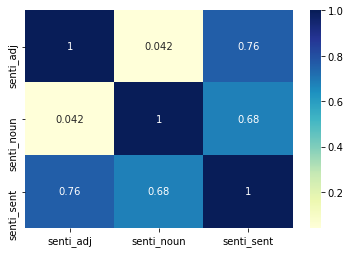

In [139]:
corrMatrix_s = df_NOM[["senti_adj", "senti_noun", "senti_sent"]].corr()
sns.heatmap(corrMatrix_s, annot=True, cmap="YlGnBu")
plt.show()

In [140]:
df_NOM.groupby(["valence_rating_sent", "polarity_noun"])["valence_rating_sent"].count()

valence_rating_sent  polarity_noun
1                    negativ          20
                     positiv          15
2                    negativ          47
                     positiv          31
3                    negativ          50
                     positiv          31
4                    negativ          51
                     positiv          40
5                    negativ          52
                     positiv          42
6                    negativ          19
                     positiv          47
7                    negativ          15
                     positiv          32
8                    negativ           1
                     positiv          21
9                    positiv           1
Name: valence_rating_sent, dtype: int64

In [141]:
df_NOM.groupby(["valence_rating_sent", "polarity_adj"])["valence_rating_sent"].count()

valence_rating_sent  polarity_adj
1                    negativ         29
                     neutral          3
                     positiv          3
2                    negativ         57
                     neutral         13
                     positiv          8
3                    negativ         39
                     neutral         31
                     positiv         11
4                    negativ         25
                     neutral         47
                     positiv         19
5                    negativ         16
                     neutral         41
                     positiv         37
6                    negativ          7
                     neutral         16
                     positiv         43
7                    neutral         13
                     positiv         34
8                    neutral          2
                     positiv         20
9                    positiv          1
Name: valence_rating_sent, dtype: int64

Regression Analysis

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
x = df_NOM.iloc[:, 7:9].values

In [144]:
# Output values 
y = df_NOM.iloc[:, 9].values  
y1 = y 
y1 = y1.reshape(-1, 1) 

In [145]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq) #R**2

coefficient of determination: 0.9999534278174739


In [146]:
print('intercept:', model.intercept_)

intercept: 0.08919168484627149


In [147]:
print('slope:', model.coef_)

slope: [0.33333491 0.33308546]


# Evaluating the Performance of SentiArt

* The Valence of the sentence after Converting the APPz scores into 9 categories 

In [148]:
df_NOM["score"] = pd.cut(df_NOM["senti_sent"], bins=9, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])

<ipython-input-148-59bdf83a2c36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NOM["score"] = pd.cut(df_NOM["senti_sent"], bins=9, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])


In [149]:
df_NOM.score.value_counts()

5    114
4    109
6     98
3     70
7     52
2     37
8     22
1     10
9      3
Name: score, dtype: int64

Text(0, 0.5, 'Label')

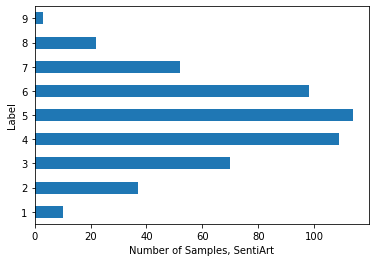

In [150]:
ax = df_NOM.score.value_counts(sort=False).plot(kind="barh")
ax.set_xlabel("Number of Samples, SentiArt")
ax.set_ylabel("Label")

Text(0, 0.5, 'Label')

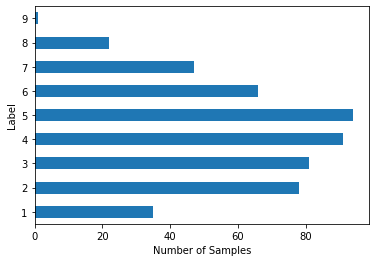

In [151]:
ax = df_NOM.valence_rating_sent.value_counts(sort=False).plot(kind="barh")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Label")

In [152]:
df_NOM[df_NOM["score"] == 9]

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent,tokenized_sents,senti_adj,senti_noun,senti_sent,score
28,Der Gesang ist anmutig.,Gesang,positiv,anmutig,positiv,8,"[Der, Gesang, ist, anmutig, .]",2.867,2.232,1.789,9
61,Die Orchidee ist makellos.,Orchidee,positiv,makellos,positiv,5,"[Die, Orchidee, ist, makellos, .]",2.212,2.355,1.611,9
63,Der Geburtstag ist wunderschön.,Geburtstag,positiv,wunderschön,positiv,7,"[Der, Geburtstag, ist, wunderschön, .]",3.256,0.942,1.488,9


In [153]:
df_NOM[df_NOM["valence_rating_sent"] == 9]

,Satz,noun,polarity_noun,adjective,polarity_adj,valence_rating_sent,tokenized_sents,senti_adj,senti_noun,senti_sent,score
41,Die Kellnerin ist dankbar.,Kellnerin,positiv,dankbar,positiv,9,"[Die, Kellnerin, ist, dankbar, .]",1.147,0.226,0.546,6


In [154]:
def print_accuracy(df, pred_column):
    "Print f1 score and accuracy after making predictions"
    f1_macro = f1_score(df["valence_rating_sent"], df[pred_column], average='macro')
    acc = accuracy_score(df["valence_rating_sent"], df[pred_column])*100
    return f1_macro, acc

In [155]:
# Get model accuracy and f1 score
acc = print_accuracy(df_NOM, "score")
print("Macro F1-score: {}\nAccuracy: {}".format(round(acc[0], 3), round(acc[1], 3)))

Macro F1-score: 0.158
Accuracy: 19.223


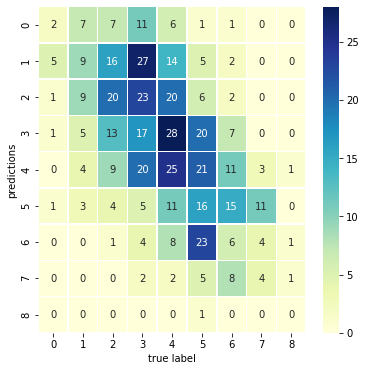

In [156]:
confusion_matrix = metrics.confusion_matrix(df_NOM.valence_rating_sent, df_NOM.score)
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= 'd',ax=ax, cmap="YlGnBu");
plt.xlabel("true label");
plt.ylabel("predictions");

* The Valence of the nouns and adjectives

In [158]:
df_NOM["senti_noun"] = np.where((df_NOM["senti_noun"] <= -0.05), "negativ", np.where((df_NOM["senti_noun"] >= 0.05),"positiv", "neutral"))

<ipython-input-158-fdf05fcb6535>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NOM["senti_noun"] = np.where((df_NOM["senti_noun"] <= -0.05), "negativ", np.where((df_NOM["senti_noun"] >= 0.05),"positiv", "neutral"))


In [159]:
df_NOM["senti_adj"] = np.where((df_NOM["senti_adj"] < -0.05), "negativ", np.where((df_NOM["senti_adj"] > 0.05),"positiv", "neutral"))

<ipython-input-159-ffe05824ef14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NOM["senti_adj"] = np.where((df_NOM["senti_adj"] < -0.05), "negativ", np.where((df_NOM["senti_adj"] > 0.05),"positiv", "neutral"))


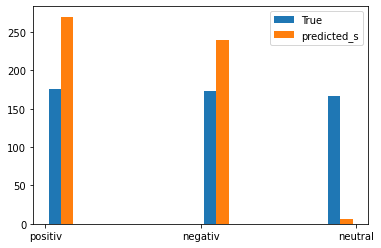

In [160]:
plt.hist([df_NOM.polarity_adj, df_NOM.senti_adj], label=["True", "predicted_s"])
plt.legend(loc='upper right')
plt.show()

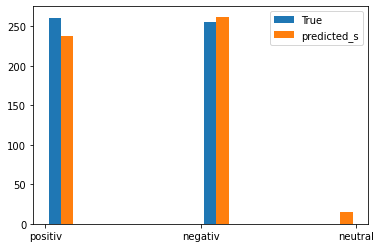

In [161]:
plt.hist([df_NOM.polarity_noun, df_NOM.senti_noun], label=["True", "predicted_s"])
plt.legend(loc='upper right')
plt.show()

In [162]:
f1_macro = f1_score(df_NOM["polarity_adj"], df_NOM["senti_adj"], average='macro')
acc = accuracy_score(df_NOM["polarity_adj"], df_NOM["senti_adj"])*100
print("f1_macro of polarity_adj vs senti_adj is:", round(f1_macro, 3))
print("accuracy of polarity_adj vs senti_adj is:", round(acc,3), "%")

f1_macro of polarity_adj vs senti_adj is: 0.513
accuracy of polarity_adj vs senti_adj is: 63.107 %


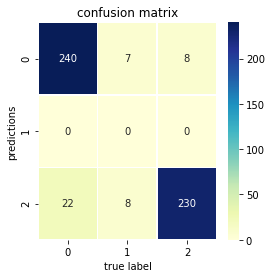

In [163]:
confusion_matrix = metrics.confusion_matrix(df_NOM["polarity_noun"], df_NOM["senti_noun"])
f,ax = plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix")
plt.xlabel("true label");
plt.ylabel("predictions");

In [164]:
f1_macro = f1_score(df_NOM["polarity_noun"], df_NOM["senti_noun"], average="macro")
acc = accuracy_score(df_NOM["polarity_noun"], df_NOM["senti_noun"])*100
print("f1_macro of polarity_noun vs senti_adj is:", round(f1_macro, 3))
print("accuracy of polarity_noun vs senti_adj is:", round(acc,3), "%")

f1_macro of polarity_noun vs senti_adj is: 0.617
accuracy of polarity_noun vs senti_adj is: 91.262 %


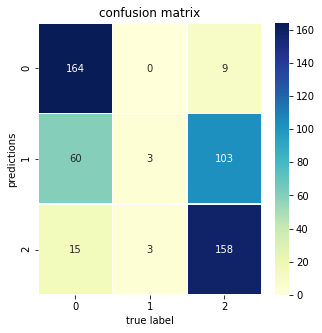

In [165]:
confusion_matrix = metrics.confusion_matrix(df_NOM["polarity_adj"], df_NOM["senti_adj"])
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix")
plt.xlabel("true label");
plt.ylabel("predictions");

# EMOLEX

In [166]:
file =  "NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx"
emo = pd.read_excel(file)
emo.head()

,English (en),Afrikaans (af),Albanian (sq),Amharic (am),Arabic (ar),Armenian (hy),Azeerbaijani (az),Basque (eu),Belarusian (be),Bengali (bn),...,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,uit die veld geslaan,prapa,ተጭኗል,الى الوراء,շեղում,sanki,aback,ззаду,পশ্চাতে,...,0,0,0,0,0,0,0,0,0,0
1,abacus,abakus,numërator,abacus,طبلية تاج,անբավարարություն,abacus,abako,абака,গণনা-যন্ত্রবিশেষ,...,0,0,0,0,0,0,0,0,0,1
2,abandon,verlaat,braktis,ውጣ,تخلى,լքել,tərk et,bertan behera,адмовіцца ад,বর্জিত করা,...,0,1,0,0,0,1,0,1,0,0
3,abandoned,verlate,braktisur,ተትቷል,مهجور,լքված,tərk etdi,abandonatutako,закінуты,পরিত্যক্ত,...,0,1,1,0,0,1,0,1,0,0
4,abandonment,verlating,braktisje,ማቋረጥ,التخلي عن,հրաժարվելով,ləğv,abandono,пакіданне,বিসর্জন,...,0,1,1,0,0,1,0,1,1,0


In [167]:
emo.columns

Index(['English (en)', 'Afrikaans (af)', 'Albanian (sq)', 'Amharic (am)',
       'Arabic (ar)', 'Armenian (hy)', 'Azeerbaijani (az)', 'Basque (eu)',
       'Belarusian (be)', 'Bengali (bn)',
       ...
       'Positive', 'Negative', 'Anger', 'Anticipation', 'Disgust', 'Fear',
       'Joy', 'Sadness', 'Surprise', 'Trust'],
      dtype='object', length=115)

In [168]:
emo = emo[["German (de)",'Positive', 'Negative']]

In [169]:
emo = emo.rename(columns={"German (de)":"de"})

In [170]:
emo.head()

,de,Positive,Negative
0,zurück,0,0
1,Abakus,0,0
2,verlassen,0,1
3,verlassen,0,1
4,Aufgabe,0,1


In [171]:
emo.shape

(14182, 3)

# The Hit Rate of EMOLEX (56.933 %)

In [172]:
emo_words = []
for word in emo["de"]:
    emo_words.append(word)
print(len(emo_words))

14182


In [173]:
match_emo = []
for word in set(word_list):
    if word in emo_words:
        match_emo.append(word)
print(len(match_emo))

271


In [174]:
print("The hit rate of EmoLex = ", round(len(match_emo)*100/len(set(word_list)),3), "%")

The hit rate of EmoLex =  56.933 %


# Emolex does not match each of Der, Die, Das, and ist, therefore we just evaluated the predicted polarity of the nouns and the adjectives

In [175]:
emo[emo["de"] == "der"]

,de,Positive,Negative


In [176]:
emo[emo["de"] == "das"]

,de,Positive,Negative


In [177]:
emo[emo["de"] == "die"]

,de,Positive,Negative


In [178]:
emo[emo["de"] == "ist"]

,de,Positive,Negative


In [179]:
match_emo_n = []
for noun in nouns:
    if noun in emo_words:
        match_emo_n.append(noun)

In [180]:
len(match_emo_n)

316

In [181]:
match_emo_a = []
for adj in adjs:
    if adj in emo_words:
        match_emo_a.append(adj)
len(match_emo_a)

326

In [182]:
test_noun = []
for noun in nouns:
    dt = emo.query('de in @noun')
    if dt.Positive.mean() == 1:
        test_noun.append("positiv")
    elif dt.Negative.mean() == 1:
        test_noun.append("negativ")
    elif dt.Negative.mean() == 0 and dt.Positive.mean() == 0:
        test_noun.append("neutral")   
    else:
        test_noun.append("NAN")

print("len(test_noun) =", len(test_noun))
print(Counter(test_noun))

len(test_noun) = 561
Counter({'NAN': 275, 'negativ': 102, 'neutral': 96, 'positiv': 88})


In [183]:
test_adj = []
for adj in adjs:
    dt = emo.query("de in @adj")
    if dt.Positive.mean() == 1:
        test_adj.append("positiv")
    elif dt.Negative.mean() == 1:
        test_adj.append("negativ")
    elif dt.Negative.mean() == 0 and dt.Positive.mean() == 0:
        test_adj.append("neutral")   
    else:
        test_adj.append("NAN")
        


print("len(test_adj) =", len(test_adj))
print(Counter(test_adj))

len(test_adj) = 561
Counter({'NAN': 278, 'negativ': 133, 'positiv': 98, 'neutral': 52})


In [184]:
df["emo_noun"] = test_noun
df["emo_adj"] = test_adj

In [185]:
df_emo = df[["noun", "polarity_noun", "emo_noun", "adjective", "polarity_adj", "emo_adj", "valence_rating_sent"]]

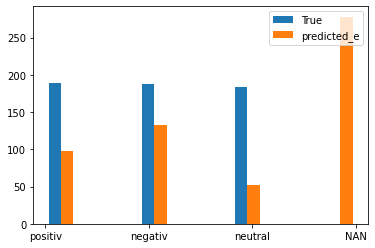

In [186]:
plt.hist([df_emo.polarity_adj, df_emo.emo_adj], label=["True", "predicted_e"])
plt.legend(loc='upper right')
plt.show()

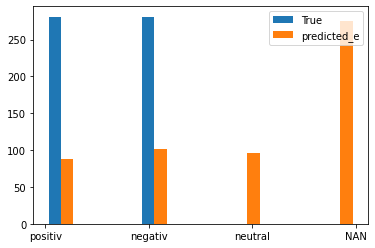

In [187]:
plt.hist([df_emo.polarity_noun, df_emo.emo_noun], label=["True", "predicted_e"])
plt.legend(loc='upper right')
plt.show()

In [188]:
df_noun = df_emo.copy()
indexNames = df_noun[ df_noun["emo_noun"] == "NAN" ].index
df_noun.drop(indexNames , inplace=True)
df_noun.shape

(286, 7)

In [189]:
f1_macro = f1_score(df_noun["polarity_noun"], df_noun["emo_noun"], average="macro")
acc = accuracy_score(df_noun["polarity_noun"], df_noun["emo_noun"])*100
print("f1_macro of polarity_noun vs emo_noun is:", round(f1_macro, 3))
print("accuracy of polarity_noun vs emo_noun is:", round(acc,3), "%")

f1_macro of polarity_noun vs emo_noun is: 0.5
accuracy of polarity_noun vs emo_noun is: 62.238 %


In [190]:
df_adj = df_emo.copy()
indexNames = df_adj[ df_adj["emo_adj"] == "NAN" ].index
df_adj.drop(indexNames , inplace=True)
df_adj.shape

(283, 7)

In [191]:
f1_macro = f1_score(df_adj["polarity_adj"], df_adj["emo_adj"], average="macro")
acc = accuracy_score(df_adj["polarity_adj"], df_adj["emo_adj"])*100
print("f1_macro of polarity_adj vs emo_adj is:", round(f1_macro, 3))
print("accuracy of polarity_adj vs emo_adj is:", round(acc,3), "%")

f1_macro of polarity_adj vs emo_adj is: 0.765
accuracy of polarity_adj vs emo_adj is: 78.799 %


# After removing both of the missing nouns and adjectives

In [192]:
df_clean = df_adj.copy()
indexNames = df_clean[ df_clean["emo_noun"] == "NAN" ].index
df_clean.drop(indexNames , inplace=True)
df_clean.shape

(150, 7)

In [193]:
f1_macro = f1_score(df_clean["polarity_noun"], df_clean["emo_noun"], average="macro")
acc = accuracy_score(df_clean["polarity_noun"], df_clean["emo_noun"])*100
print("f1_macro of polarity_noun vs emo_noun is:", round(f1_macro, 3))
print("accuracy of polarity_noun vs emo_noun is:", round(acc,3), "%")

f1_macro of polarity_noun vs emo_noun is: 0.526
accuracy of polarity_noun vs emo_noun is: 66.667 %


In [194]:
f1_macro = f1_score(df_clean["polarity_adj"], df_clean["emo_adj"], average= "macro")
acc = accuracy_score(df_clean["polarity_adj"], df_clean["emo_adj"])*100
print("f1_macro of polarity_adj vs emo_adj is:", round(f1_macro, 3))
print("accuracy of polarity_adj vs emo_adj is:", round(acc,3), "%")


f1_macro of polarity_adj vs emo_adj is: 0.749
accuracy of polarity_adj vs emo_adj is: 78.667 %
